Problem 1-3 \
Assignment 2 \
\
group members:
1) Shuhan Xiao (Uni-id: kg410 Matrikelnr.: 3160697), 
2) Klaus Kades (Uni-id: fw448 Matrikelnr.: 3408463), 
3) Lucas-Raphael Müller (Uni-id: al413 Matrikelnr.: 3205638), 
4) Melanie Schellenberg (Uni-id: qh400 Matrikelnr.: 3146390)

In [1]:
# Install a pip package in the current Jupyter kernel
! pip install numpy pandas python-igraph matplotlib pycairo cairocffi networkx

In [2]:
!ls /workplace/CNA/Complex-Network-Analysis-Exercises/assignment-2/ucidata-zachary/*
!head /workplace/CNA/Complex-Network-Analysis-Exercises/assignment-2/ucidata-zachary/out.ucidata-zachary

/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-2/ucidata-zachary/meta.ucidata-zachary
/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-2/ucidata-zachary/out.ucidata-zachary
/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-2/ucidata-zachary/README.ucidata-zachary
% sym unweighted
% 78 34 34
1 2
1 3
2 3
1 4
2 4
3 4
1 5
1 6


In [3]:
import matplotlib.pyplot as plt
import numpy as np 

#calculation of cumulative values
def calculate(degree_freq, threshold):
    cumulative_value=0
    for degree, i in enumerate(range(len(degree_freq))):
        if degree>=threshold:
            cumulative_value+=degree_freq[i]
        else:
            continue           
    return cumulative_value


def cumulative_degree_p(data, save_name, task2):
    
    #generation of graph
    g = nx.Graph()
    for x,y in data.itertuples(index=False):
        g.add_edge(x, y)
    graphs=[g]
    name={}
    name[0]=save_name[:-4]
    fig = plt.figure(figsize=(12, 8)) 
    ax = fig.add_subplot(1, 1, 1)

    if task2==True:
        g_random =nx.gnm_random_graph(n=len(g.nodes), m=len(g.edges), seed=2, directed=False)
        graphs=[g,g_random]
        name[1]='random'

        
    for id, graph in enumerate(graphs):
        #get degree distribution
        degree_freq = nx.degree_histogram(graph)

        #calculation of cumulative degree distribution
        cumulative_degree_prob=[]
        for threshold in range(len(degree_freq)):
            cumulative_value = calculate(degree_freq, threshold)
            if threshold==0:
                normalization_value= cumulative_value
            cumulative_degree_prob.append(cumulative_value)

        #normalization of cumulative degree distribution
        cumulative_degree_prob_norm=[value/normalization_value for value in cumulative_degree_prob]
        degrees=len(degree_freq)

        #plotting
        ax.step(range(degrees) , cumulative_degree_prob_norm, label=name[id])
        ax.set_xlabel('Degree (d)', fontsize=20)
        ax.set_ylabel('P(x \u2265 d)', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.legend()
        plt.title(save_name[:-4], fontsize=25)
    plt.savefig(save_name)




           X     Y
0         30  1412
1         30  3352
2         30  5254
3         30  5543
4         30  7478
...      ...   ...
103684  8272  4940
103685  8273  4940
103686  8150  8275
103687  8150  8276
103688  8274  8275

[103689 rows x 2 columns]


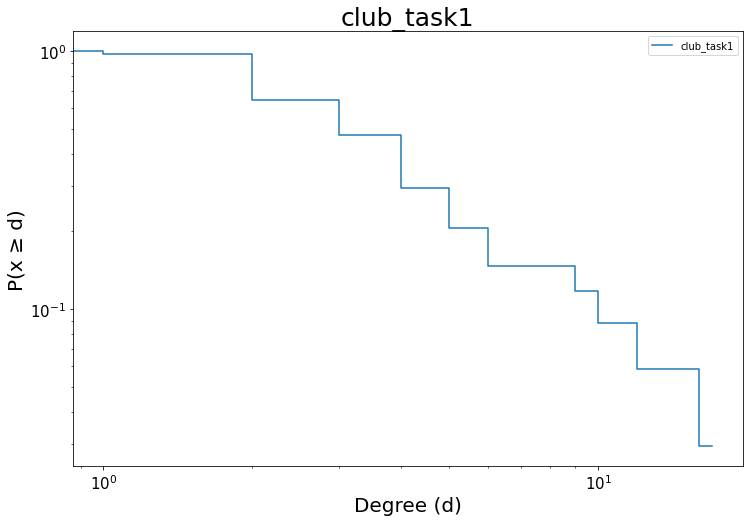

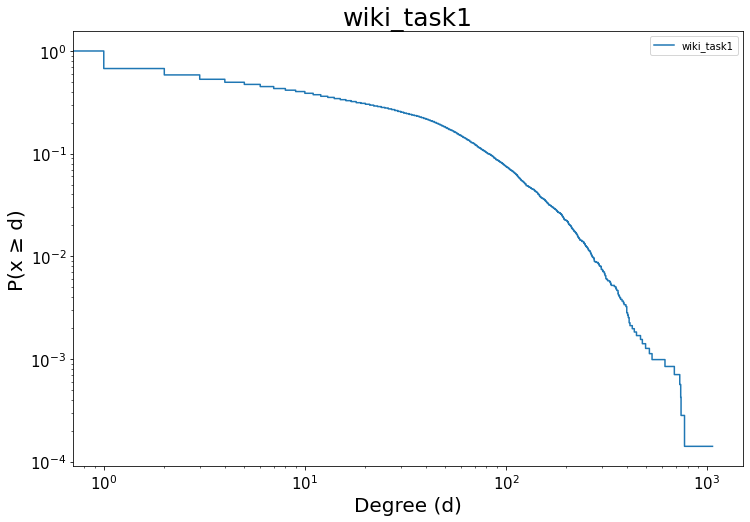

In [9]:
"""
Task1
"""
import pandas as pd 
import networkx as nx

# #Zachary data (N<250)
colnames=[ 'X', 'Y'] 
club = pd.read_csv('/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-2/ucidata-zachary/out.ucidata-zachary', sep=' ', skiprows=2, names=colnames)


cumulative_degree_p(club, 'club_task1.png', task2=False)


#WikiVote data (N>2500)
colnames=[ 'X', 'Y'] 
wiki = pd.read_csv('/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-2/Wiki-Vote.txt', sep='\t', skiprows=4, names=colnames)

print(wiki)

cumulative_degree_p(wiki, 'wiki_task1.png', task2=False)


           X     Y
0         30  1412
1         30  3352
2         30  5254
3         30  5543
4         30  7478
...      ...   ...
103684  8272  4940
103685  8273  4940
103686  8150  8275
103687  8150  8276
103688  8274  8275

[103689 rows x 2 columns]


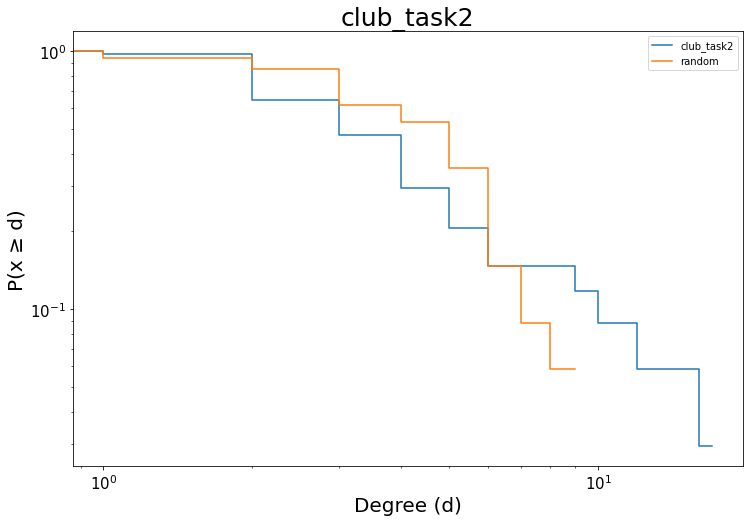

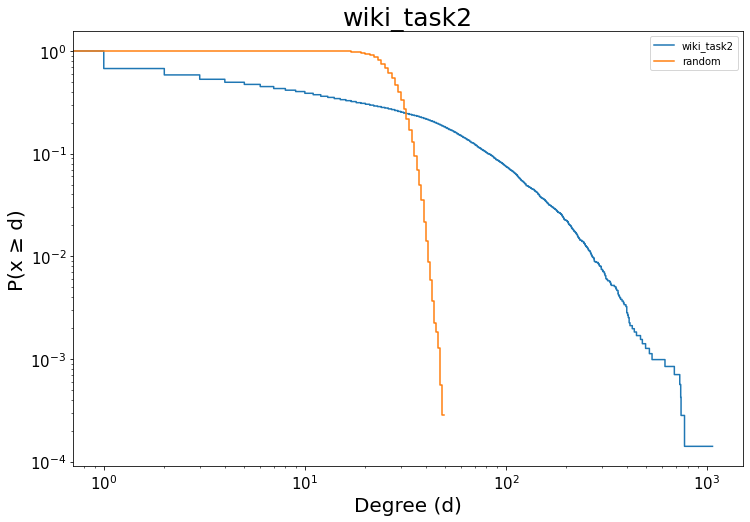

In [8]:
import pandas as pd 
import networkx as nx

# #Zachary data (N<250)
colnames=[ 'X', 'Y'] 
club = pd.read_csv('/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-2/ucidata-zachary/out.ucidata-zachary', sep=' ', skiprows=2, names=colnames)


cumulative_degree_p(club, 'club_task2.png', task2=True)


#WikiVote data (N>2500)
colnames=[ 'X', 'Y'] 
wiki = pd.read_csv('/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-2/Wiki-Vote.txt', sep='\t', skiprows=4, names=colnames)

print(wiki)

cumulative_degree_p(wiki, 'wiki_task2.png', task2=True)
